In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
data1 = pd.read_csv('../results/imbalance_predictions_smard_real_lstm_seq2seq_additive_corrected_hour.csv')
data2 = pd.read_csv('../results/imbalance_predictions_smard_real_mse_lstm_naive_hour.csv')
data3 = pd.read_csv('../results/imbalance_predictions_smard_real_mse_lstm_seq2seq_additive_regu_31_07_hour.csv')
data4 = pd.read_csv('../results/imbalance_predictions_smard_real_mse_lstm_stacked_hour.csv')

# Convert 'start_time' to datetime and set it as the index for each dataset
for data in [data1, data2, data3, data4]:
    data['start_time'] = pd.to_datetime(data['start_time'])
    data.set_index('start_time', inplace=True)


model_info = {
    #"M_Naive": {"color": "#8785BA", "label": r"$M_{Naive}$"},
    # "M_Stacked": {"color": "#C195C4", "label": r"$M_{Stacked}$"},
    "M_Seq2Seq": {"color": "#95AAD3", "label": r"$M_{Seq2Seq}$"},
    "M_RegSeq2Seq": {"color": "#06948E", "label": r"$M_{RegSeq2Seq}$"},
    "SMARD": {"color": "#A9A9A9", "label": "SMARD"},  # Gray tone for SMARD
    "Real": {"color": "darkred", "label": "Real"}
}

# Filter data for February 2023
start_date = ['2023-09-01', '2023-11-01', '2024-03-01', '2024-06-01']
end_date = ['2023-10-01', '2023-12-01', '2024-04-01', '2024-07-01']

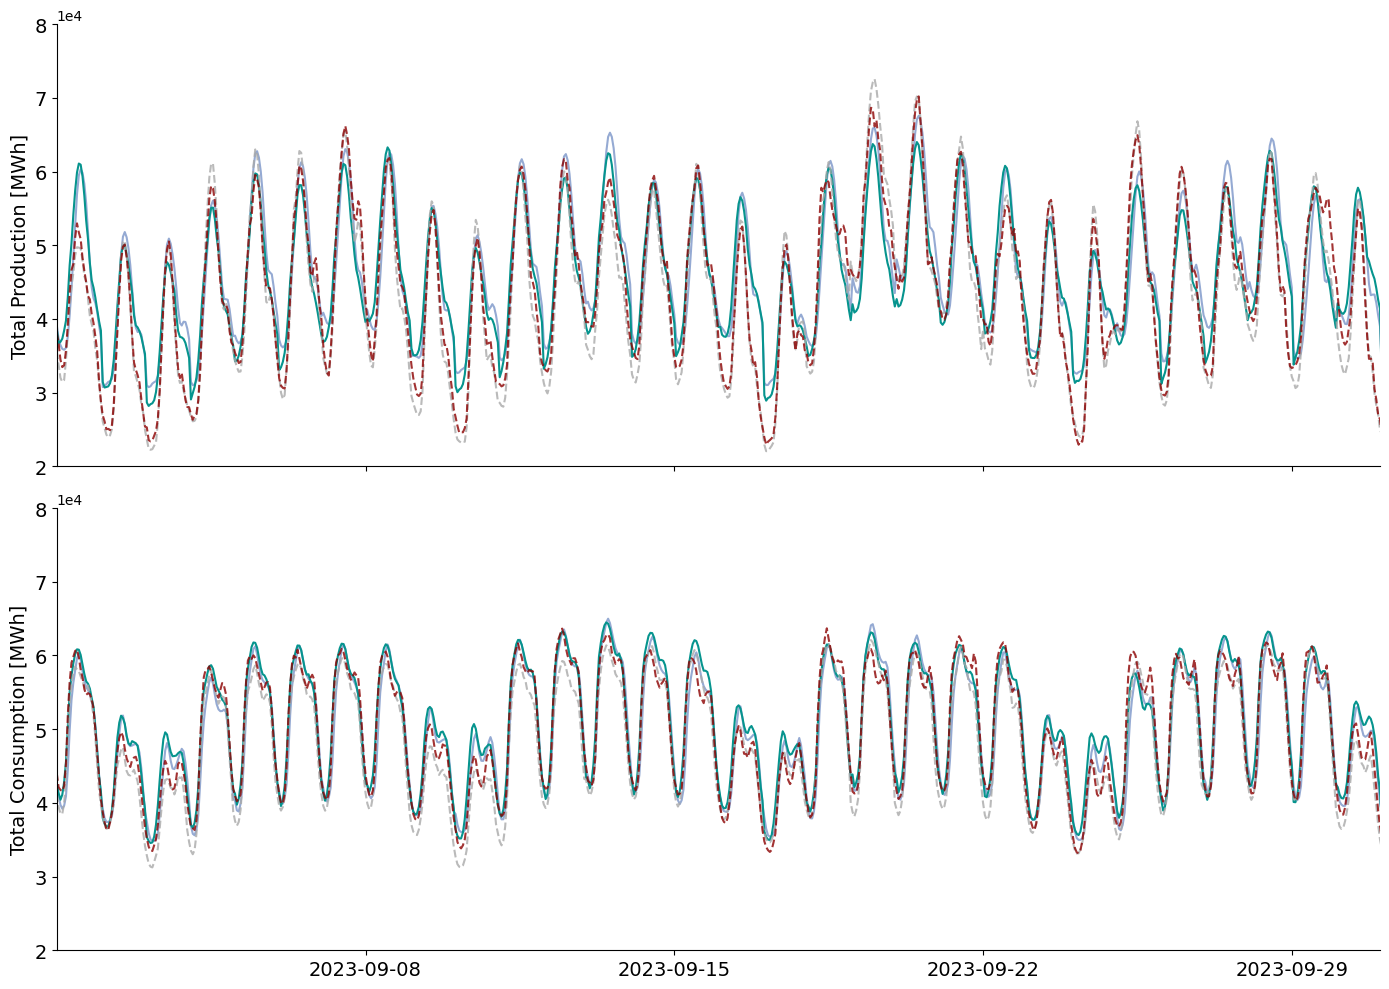

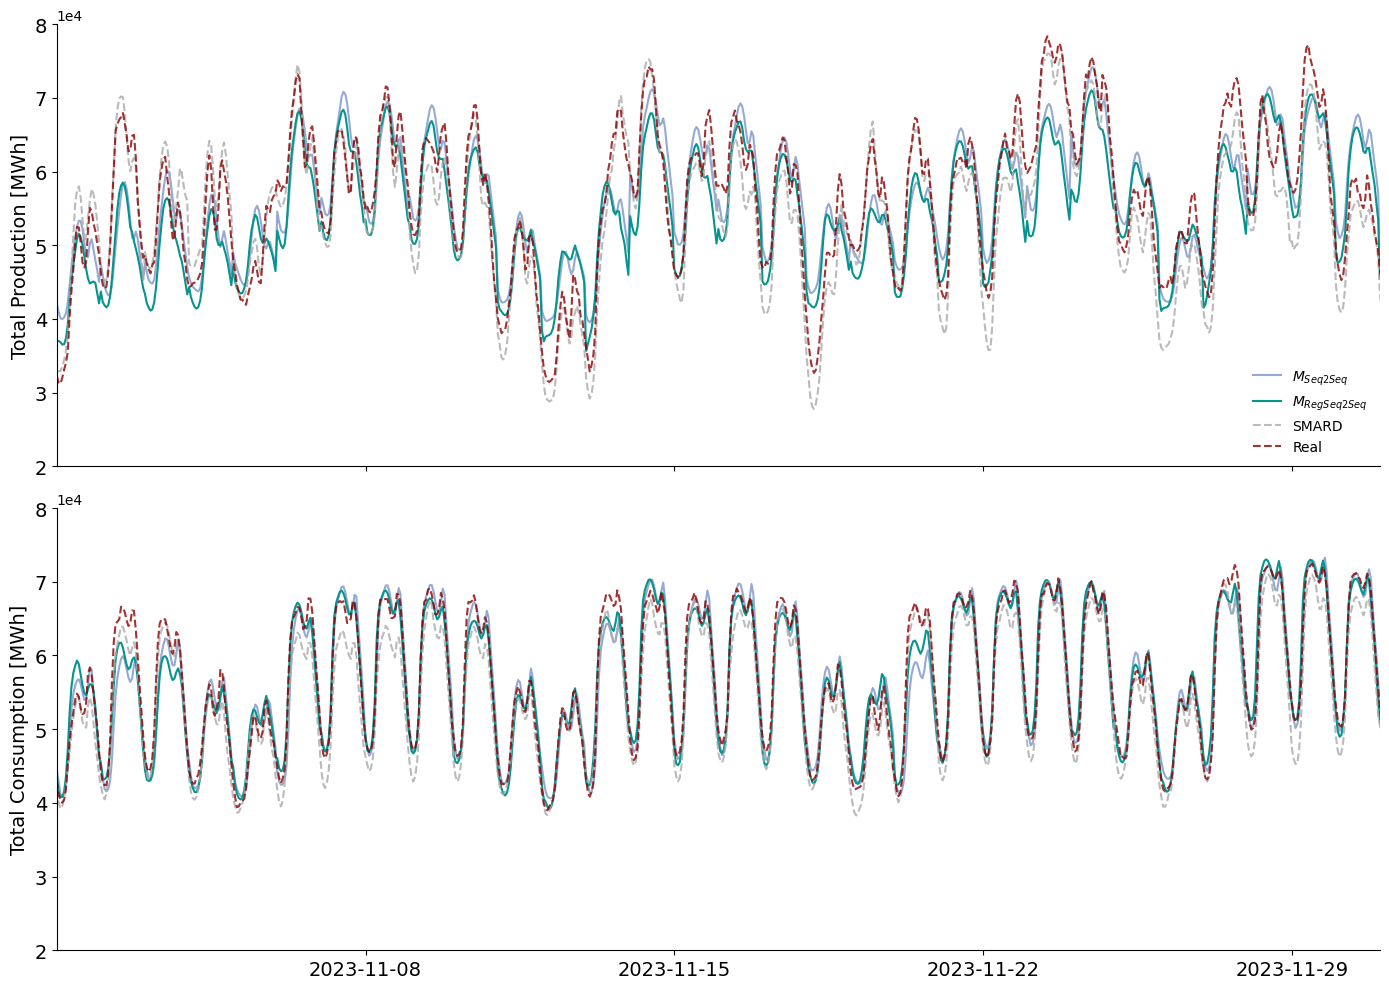

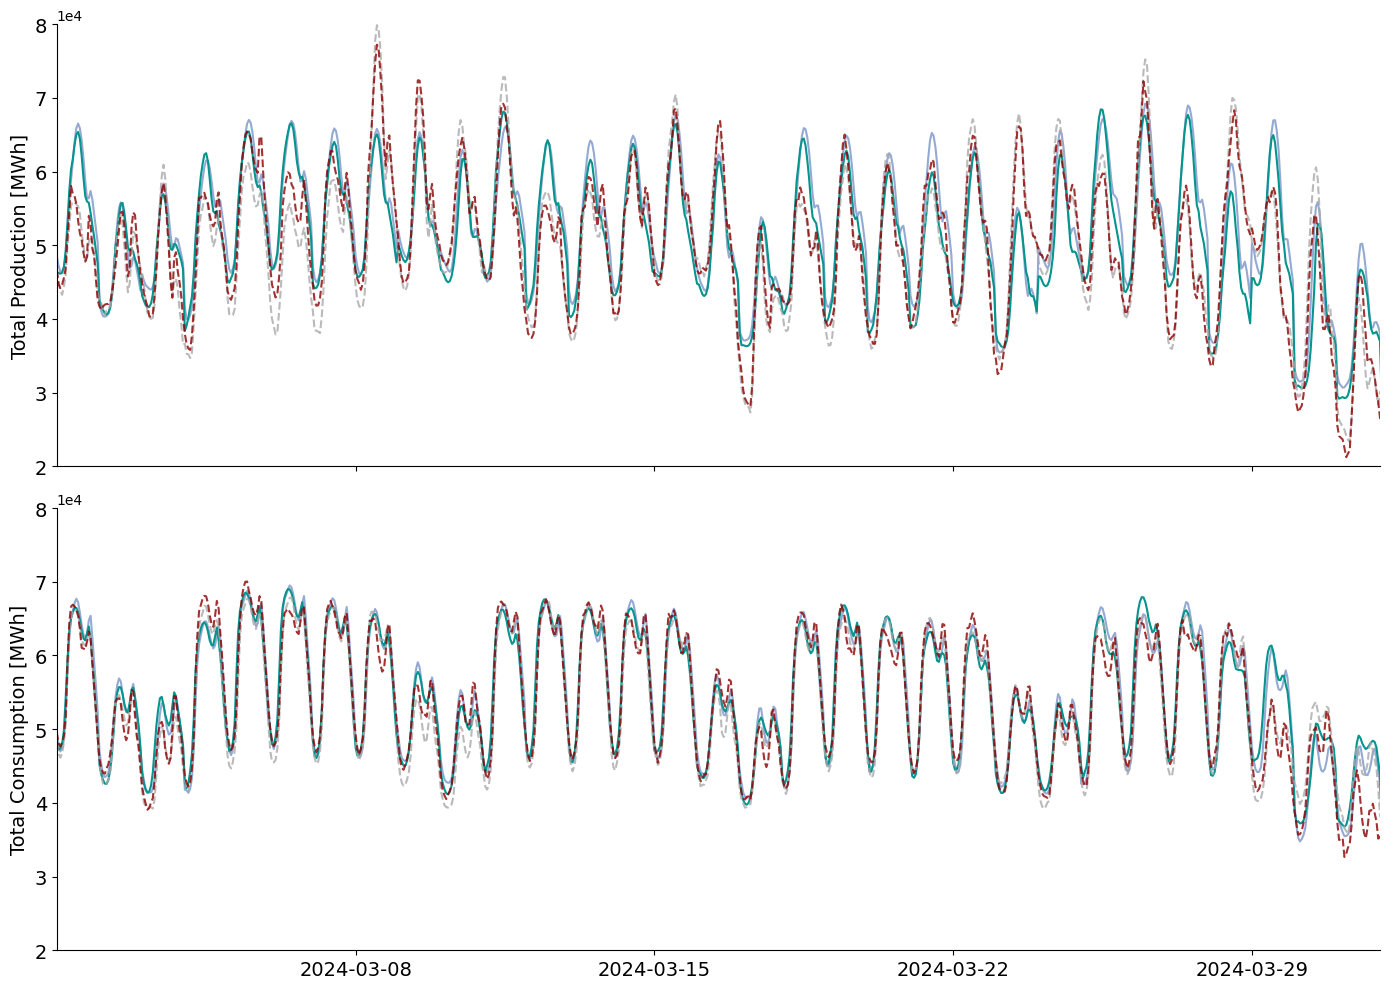

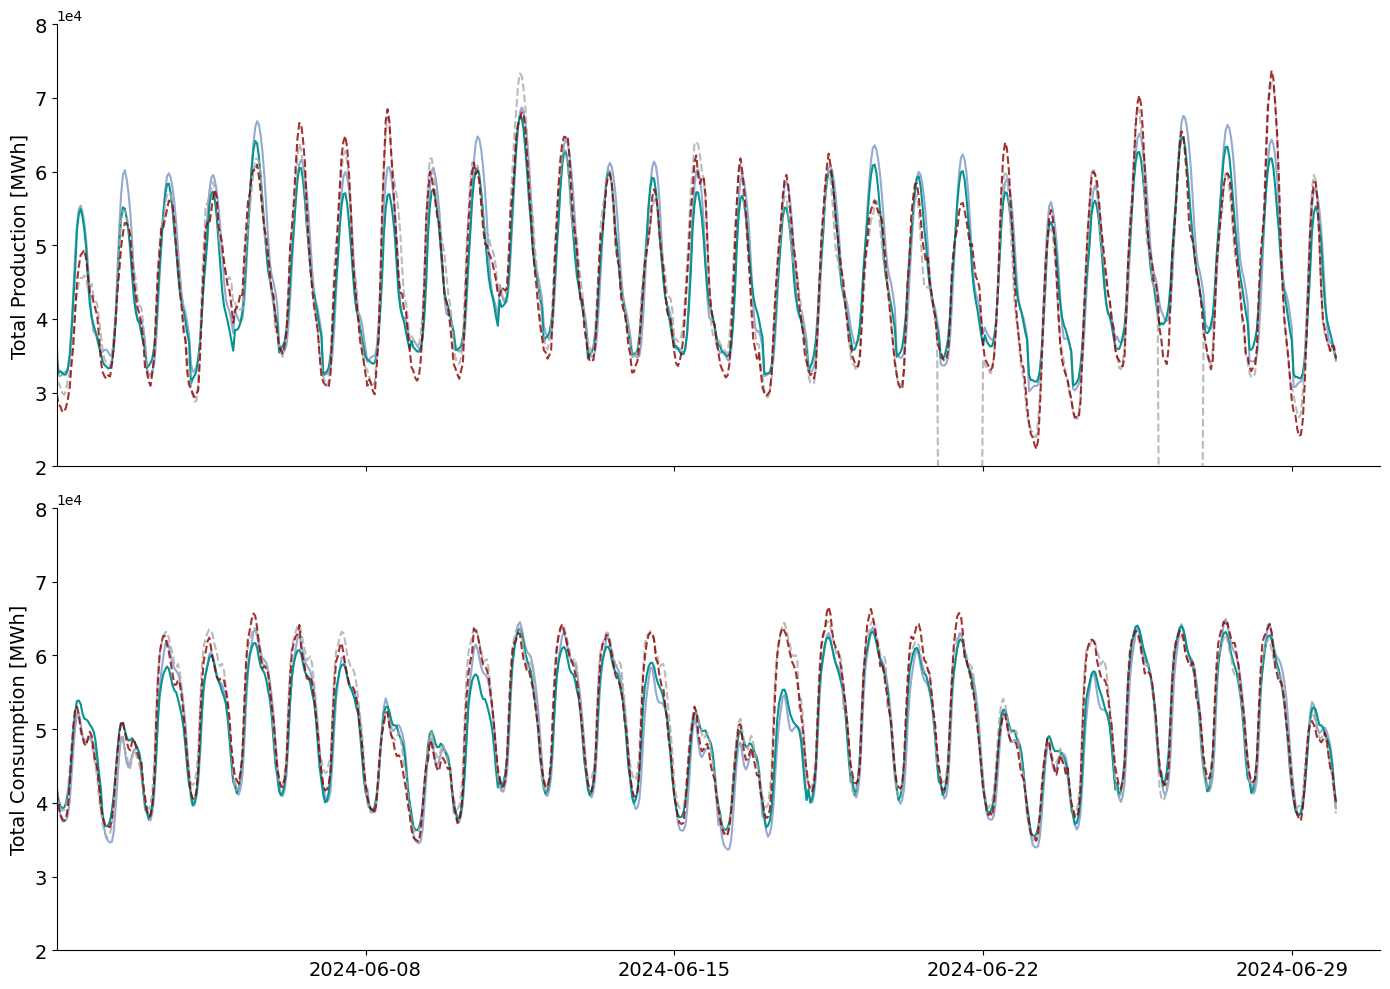

In [125]:
# Filter data for February 2023
start_dates = ['2023-09-01', '2023-11-01', '2024-03-01', '2024-06-01']
end_dates = ['2023-10-01', '2023-12-01', '2024-04-01', '2024-07-01']
for start_date, end_date in zip(start_dates, end_dates):
    data = pd.DataFrame({
        'Real Total Production': data1['total_production_mwh'][start_date:end_date],
        'Real Total Consumption': data1['total_load_mwh'][start_date:end_date],
        'SMARD Total Production': data1['smard_total_production_mwh'][start_date:end_date],
        'SMARD Total Consumption': data1['smard_total_load_mwh'][start_date:end_date],
        'M_Seq2Seq Production': data1['pred_total_production_mwh'][start_date:end_date],
        'M_Seq2Seq Consumption': data1['pred_total_load_mwh'][start_date:end_date],
        'M_Naive Production': data2['pred_total_production_mwh'][start_date:end_date],
        'M_Naive Consumption': data2['pred_total_load_mwh'][start_date:end_date],
        'M_RegSeq2Seq Production': data3['pred_total_production_mwh'][start_date:end_date],
        'M_RegSeq2Seq Consumption': data3['pred_total_load_mwh'][start_date:end_date],
        'M_Stacked Production': data4['pred_total_production_mwh'][start_date:end_date],
        'M_Stacked Consumption': data4['pred_total_load_mwh'][start_date:end_date]
    })
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Plot for total production
    for model in model_info:
        # Add Production to the model name to get the correct column name
        model_production = model + " Production" if "_" in model else model + " Total Production"
        style = "--" if "M_" not in model_production else "-"
        alpha = 0.8 if "M_" not in model_production else 1
        ax1.plot(data.index, data[model_production], label=model_info[model]["label"], color=model_info[model]["color"], linestyle=style, alpha=alpha)

    for model in model_info:
        model_consumption = model + " Consumption" if "_" in model else model + " Total Consumption"
        style = "--" if not "M_" in model_consumption else "-"
        alpha = 0.8 if "M_" not in model_consumption else 1
        ax2.plot(data.index, data[model_consumption], label=model_info[model]["label"], color=model_info[model]["color"], linestyle=style, alpha=alpha)
    if start_date == start_dates[1]:
        ax1.legend(loc='upper right', bbox_to_anchor=(1.5, 1.2))
        ax1.legend(framealpha=0)
    # remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    # Make y-ticks scientific
    ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    # x_lim should always start from start_date
    ax1.set_xlim(left=pd.to_datetime(start_date), right=pd.to_datetime(end_date))
    # x ticks should be 1st, 8th, 15th, 22nd, 29th of each month
    ax1.set_xticks(pd.to_datetime([f"{start_date[:8]}08", f"{start_date[:8]}15", f"{start_date[:8]}22", f"{start_date[:8]}29"]))
    ax1.set_xticklabels([f"{start_date[:8]}08", f"{start_date[:8]}15", f"{start_date[:8]}22", f"{start_date[:8]}29"])
    # x ticklabel should be horizontal and size 12
    ax2.tick_params(axis='x', labelsize=14)
    # y_lim always max 8e6
    ax1.set_ylim(2e4, 8e4)
    ax2.set_ylim(2e4, 8e4)
    ax1.tick_params(axis='y', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)
    
    # Set y label
    ax1.set_ylabel('Total Energy Generation [MWh]', fontsize=14)
    ax2.set_ylabel('Total Energy Consumption [MWh]', fontsize=14)
    ax1.patch.set_alpha(0)
    ax2.patch.set_alpha(0)
    # set legend background to be transparent

    # set transparent background to the whole figure
    fig.patch.set_alpha(0)
    fig.autofmt_xdate(rotation=0, ha='center')
    # reduce vertical space between subplots
    plt.subplots_adjust(hspace=0.0001)
    plt.tight_layout()
    plt.show()
    # save plot
    fig.savefig(f'../plots/figures/total_production_consumption_{start_date}_{end_date}.png', dpi=300, bbox_inches='tight')
